# IMPORT

In [ ]:
  !sudo apt-get install -y fonts-nanum
  !sudo fc-cache -fv
  !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 2s (6,397 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122542 files and di

In [ ]:
pip install optuna==2.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.9/226.9 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.2/147.2 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 17.2 MB/s eta 0:00:00
  Created wheel for optuna: filename=optuna-2.0.0-py3-none-any.whl size=312821 sha256=91d68ee330dd81db6fc0b4819ca4631e23ff23f22391957480b8460d8e6c8558
  Stored in directory: /root/.cache/pip/wheels/88/08/60/552399d1ae00b0d56554e4c0f80809c4c42a94de19e68ce

In [ ]:
pip install xgboost==1.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.6/127.6 MB 7.9 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.7.5
    Uninstalling xgboost-1.7.5:
      Successfully uninstalled xgboost-1.7.5


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# 하이퍼파라미터 최적화 라이브러리
import optuna

# 그레디언트 부스팅 결정 트리 라이브러리
import xgboost as xgb

# 라벨 인코딩을 위한 라이브러리
from sklearn.preprocessing import LabelEncoder

# 랜덤포레스트 라이브러리
from sklearn.ensemble import RandomForestRegressor as rf

# 홀드아웃, 교차 검증을 위한 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# 정확도 계산 라이브러리
from sklearn.metrics import mean_absolute_error # 평균절대오차

# lightgbm 라이브러리
import lightgbm as lgb

import warnings
warnings.filterwarnings("ignore", category=UserWarning)


# 랜덤 시드 설정
np.random.seed(1234)
random.seed(1234)
# 스타일 설정
plt.style.use("ggplot")
# 폰트 설정
plt.rc('font', family='NanumBarunGothic')

/usr/local/lib/python3.10/dist-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [ ]:
# 구글드라이브 사용
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 데이터 불러오기
train_df = pd.read_csv('경로/train.csv')
test_df = pd.read_csv('경로/test.csv')
submission = pd.read_csv('경로/sample_submission.csv')

In [ ]:
train_df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


# 베이스라인 작성

### 데이터 개요 파악

In [ ]:
# 학습 데이터의 변수 유형 확인하기
train_df.dtypes

id                  int64
Sex                object
Length            float64
Diameter          float64
Height            float64
Weight            float64
Shucked Weight    float64
Viscera Weight    float64
Shell Weight      float64
Age                 int64
dtype: object

**object 데이터**

In [ ]:
# object 데이터의 개요 확인하기
train_df["Sex"].value_counts()

M    27084
I    23957
F    23010
Name: Sex, dtype: int64

-> 약 30%가 불분명한 성별

In [ ]:
# object 데이터의 개요 확인하기
test_df["Sex"].value_counts()

M    17923
I    15963
F    15482
Name: Sex, dtype: int64

-> test도 성별을 모를 때 존재

-> I일 때에도 예측할 수 있어야함

-> I를 따로 처리하지는 말자

**수치 데이터**

In [ ]:
# 수치 데이터의 개요 확인하기
train_df.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,37025.000000,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,21376.826729,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,18512.500000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,37025.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,55537.500000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,74050.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


-> Height가 0인거 존재

In [ ]:
print((train_df['Height'] == 0).sum())
train_df[train_df['Height'] == 0]

24


,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
762,762,I,0.787500,0.5750,0.0,3.727959,1.417475,0.807961,1.133980,4
3585,3585,I,0.737087,0.5250,0.0,2.267960,0.737087,0.652038,0.708738,5
8749,8749,I,0.525000,0.3750,0.0,2.863300,1.204854,0.425243,0.425243,4
9320,9320,I,0.462500,0.3250,0.0,0.893009,0.354369,0.141747,0.269320,7
11542,11542,I,0.637500,0.4375,0.0,1.771844,0.637864,0.396893,0.462525,3
13456,13456,I,0.575000,0.4000,0.0,1.304077,0.467767,0.340194,0.382718,3
14406,14406,I,0.737500,0.5375,0.0,3.515338,1.630096,0.737087,0.878834,2
15463,15463,I,0.500000,0.4000,0.0,1.318252,0.411068,0.226796,0.283495,4
16301,16301,I,0.437500,0.3625,0.0,1.077281,0.467767,0.184272,0.255146,4
28362,28362,I,0.387500,0.2625,0.0,0.496116,0.141747,0.099223,0.141747,3


In [ ]:
print((test_df['Height'] == 0).sum())
test_df[test_df['Height'] == 0]

14


,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
9726,83777,I,0.7375,0.5500,0.0,3.869707,1.630096,0.807961,9.936500
13897,87948,I,1.0250,0.8125,0.0,10.418441,4.124852,2.508931,3.401940
15146,89197,I,0.7500,0.5750,0.0,3.940580,1.601747,0.807961,1.190679
18951,93002,I,0.5875,0.4000,0.0,1.998640,0.949708,0.340194,0.425243
24239,98290,I,0.8500,0.6875,0.0,5.428929,2.182911,1.063106,1.516698
24986,99037,I,0.8500,0.6500,0.0,5.669900,2.267960,0.978058,1.559222
26879,100930,I,0.4000,0.3000,0.0,0.907184,0.311845,0.212621,0.283495
31053,105104,I,0.5625,0.4250,0.0,1.630096,1.105630,0.184272,0.425243
36603,110654,M,0.7250,0.5625,0.0,2.764076,1.516698,0.623689,0.850485
39247,113298,M,1.2125,0.9375,0.0,14.770089,5.669900,3.486988,4.819415


->  0인 애들은 나이가 평균보다 대부분 낮음

->  그말은 냅다 안잰게 아니라 너무 작아서 안잰걸로 치는거 아닐까? 냅두자

-> 설명변수는 성별정도만 인코딩해주면 될듯

### 데이터 인코딩

In [ ]:
# 학습 데이터와 테스트 데이터 결합
all_df = pd.concat([train_df, test_df], sort = False).reset_index(drop = True)
all_df

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9.0
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8.0
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9.0
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11.0
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8.0
...,...,...,...,...,...,...,...,...,...,...
123414,123414,F,1.3000,1.0375,0.3250,16.315137,6.690482,5.173784,3.756309,NaN
123415,123415,I,1.0375,0.7625,0.2625,10.276694,4.436697,1.998640,3.543687,NaN
123416,123416,F,1.4875,1.1625,0.3625,31.382897,11.396499,6.846404,8.788345,NaN
123417,123417,F,1.2375,0.9500,0.2875,15.663099,6.095142,3.727959,4.961163,NaN


In [ ]:
# 학습 데이터의 변수 유형 확인하기
all_df.dtypes

id                  int64
Sex                object
Length            float64
Diameter          float64
Height            float64
Weight            float64
Shucked Weight    float64
Viscera Weight    float64
Shell Weight      float64
Age               float64
dtype: object

In [ ]:
# object 데이터의 개요 확인하기
all_df["Sex"].value_counts()

M    45007
I    39920
F    38492
Name: Sex, dtype: int64

In [ ]:
mapping = {'M': 0, 'F': 1, 'I': 2}
all_df["Sex"] = all_df["Sex"].map(mapping)
all_df["Sex"] = all_df["Sex"].astype("category")

all_df["Sex"].value_counts()

0    45007
2    39920
1    38492
Name: Sex, dtype: int64

In [ ]:
# 데이터타입이 object에서 category로 바뀐 것을 확인할 수 있음
all_df.dtypes

id                   int64
Sex               category
Length             float64
Diameter           float64
Height             float64
Weight             float64
Shucked Weight     float64
Viscera Weight     float64
Shell Weight       float64
Age                float64
dtype: object

In [ ]:
# 학습 데이터와 테스트 데이터로 되돌리기 (Age를 기준으로 분류)
train_df_le = all_df[~all_df["Age"].isnull()]
test_df_le = all_df[all_df["Age"].isnull()]


### 교차 검증으로 모델 학습 / 예측

학습 데이터를 세 개로 분할하고, 각 데이터로 모델을 작성한 후 테스트 데이터에 대한 예측 정확도 평균을 구해보자

In [ ]:
# 분할 데이터 수 5으로 설정
folds = 5
kf = KFold(n_splits = folds)

In [ ]:
# 하이퍼파라미터 설정하기
lgbm_params = {
    "objective" : "regression",
    "random_seed" : 1234
}

In [ ]:
# 설명 변수와 목적 변수 지정하기
# 목적 변수 : Age
# 설명 변수 : 원래 데이터에서 Age와 학습에 불필요한 Id를 삭제한 것
train_X = train_df_le.drop(["Age", "id"], axis = 1)
train_Y = train_df_le["Age"]

In [ ]:
# 모델별 예측 값 저장하기
models = [] # fold별 모델
mae = [] # fold별 mae 결과값
oof = np.zeros(len(train_X)) # 초기값 0, fold별 해당 값 갱신 (해당 데이터를 제외한 나머지 데이터를 사용하여 목적 변수를 예측한 값)

for train_index, val_index in kf.split(train_X) :
  X_train = train_X.iloc[train_index]
  X_valid = train_X.iloc[val_index]
  y_train = train_Y.iloc[train_index]
  y_valid = train_Y.iloc[val_index] # 각 인덱스를 기준으로 split된 train set과 val set 자르기

  lgb_train = lgb.Dataset(X_train, y_train) # 학습 데이터셋
  lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train) # 검증 데이터셋

  model_lgb = lgb.train(lgbm_params,
                        lgb_train,
                        valid_sets = lgb_eval,

                        num_boost_round = 100, # boosting iterate 수
                        early_stopping_rounds=20, # 조기종료를 위한 값
                        verbose_eval = 10 # 메시지 출력 간격
                        )

  y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration) # 최고 iteration을 사용한 예측값
  tmp_mae = mean_absolute_error(y_valid, y_pred) # 정확도 계산
  print(tmp_mae) # 평균절대오차

  models.append(model_lgb)
  mae.append(tmp_mae)
  oof[val_index] = y_pred

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001978 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1321
[LightGBM] [Info] Number of data points in the train set: 59240, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 9.968704
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 5.07721
[20]	valid_0's l2: 4.35284
[30]	valid_0's l2: 4.21294
[40]	valid_0's l2: 4.17124
[50]	valid_0's l2: 4.15571
[60]	valid_0's l2: 4.1503
[70]	valid_0's l2: 4.14771
[80]	valid_0's l2: 4.14678
[90]	valid_0's l2: 4.14416
[100]	valid_0's l2: 4.14136
Did not meet early stopping. Best iteration is:
[96]	valid_0's l2: 4.14031
1.3875466248955586
[LightG

In [ ]:
# mae 평균 계산
sum(mae)/len(mae)

1.4013067832760806

<Axes: >

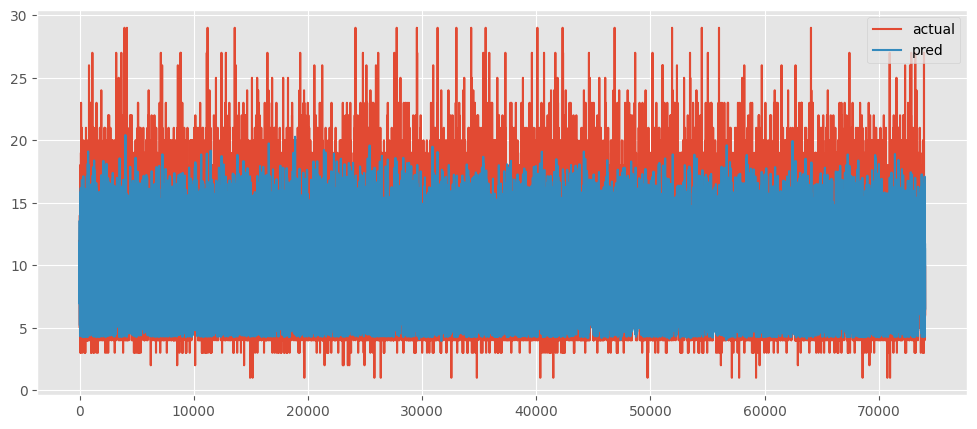

In [ ]:
# 현제 예측 값과 실제 값 차이 확인하기
actual_pred_df = pd.DataFrame({
    "actual" : train_Y,
    "pred" : oof
})
actual_pred_df.plot(figsize = (12,5))

-> 완전 한정적으로 예측

-> 크닐났다 너무 직사각형이야

### 이상치 원인 탐색

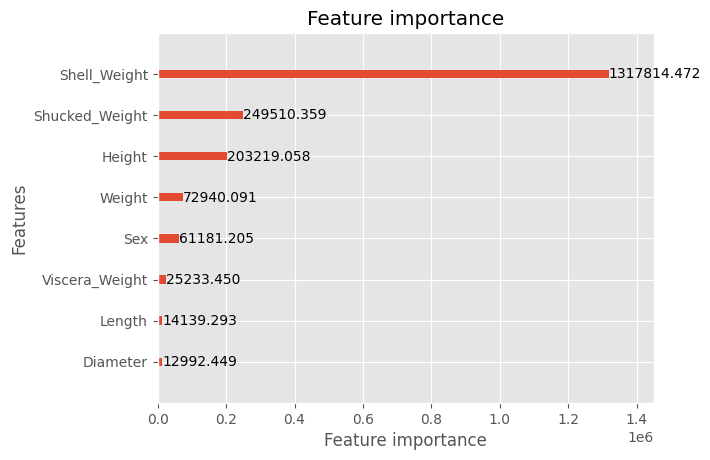

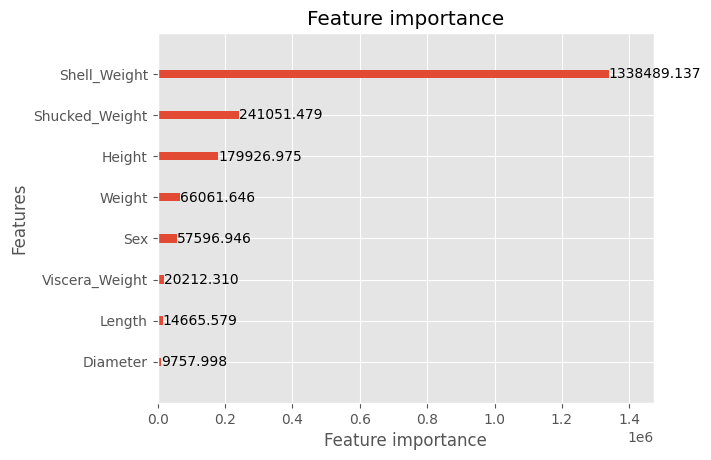

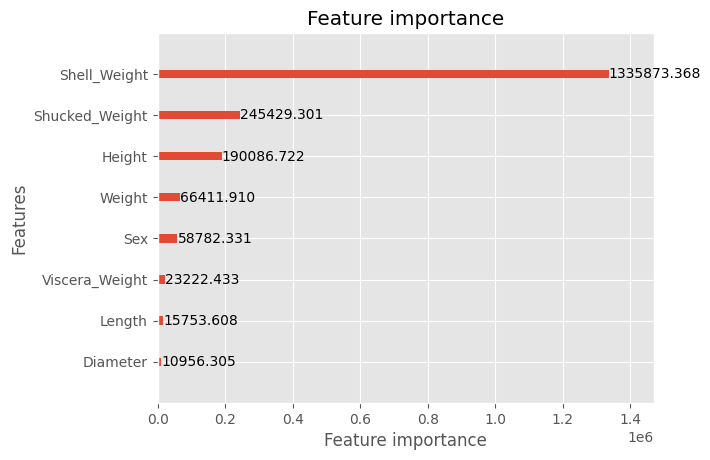

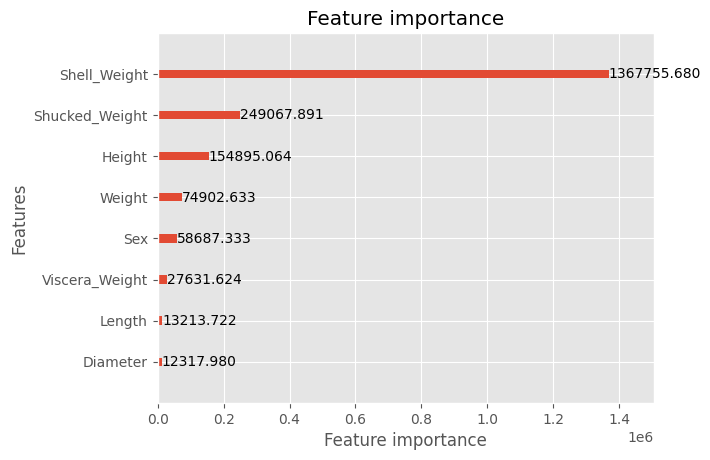

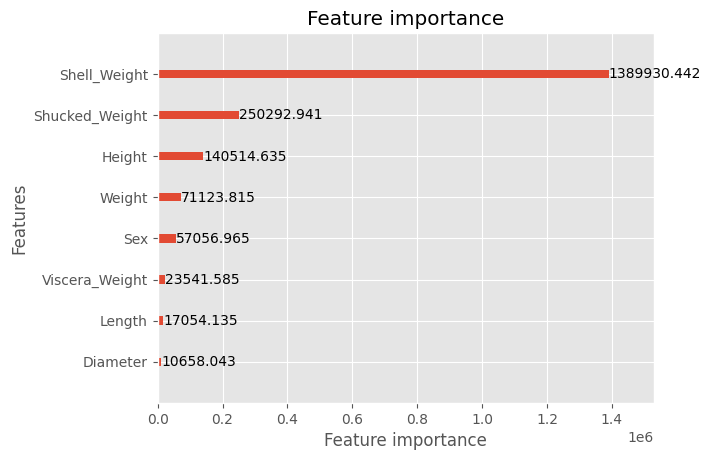

In [ ]:
# 각 모델의 변수별 중요도 확인
for model in models:
  lgb.plot_importance(model, importance_type = "gain")

-> 게한테는 껍데기같은 무게들이 중요허네

# 목적 변수 전처리

-> Age 분포 확인

In [ ]:
train_df["Age"].describe()

count    74051.000000
mean         9.967806
std          3.175189
min          1.000000
25%          8.000000
50%         10.000000
75%         11.000000
max         29.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

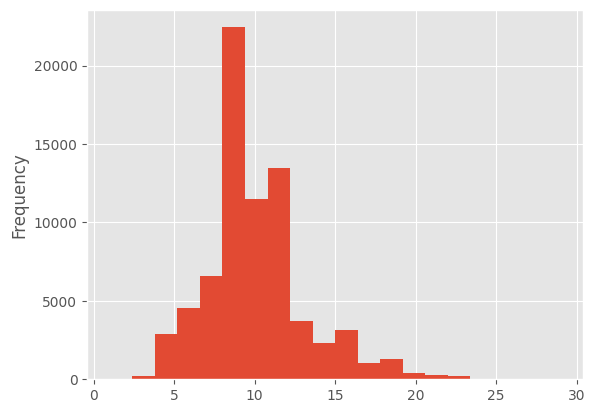

In [ ]:
# 기본 분포 -> 약간 쏠림
train_df["Age"].plot.hist(bins = 20)

In [ ]:
# 로그 분포 -> 가운데가 안맞긴 한데 대칭 이쁨
np.log(train_df['Age'])

0        2.197225
1        2.079442
2        2.197225
3        2.397895
4        2.079442
           ...   
74046    2.302585
74047    1.791759
74048    2.302585
74049    2.079442
74050    1.791759
Name: Age, Length: 74051, dtype: float64

<Axes: ylabel='Frequency'>

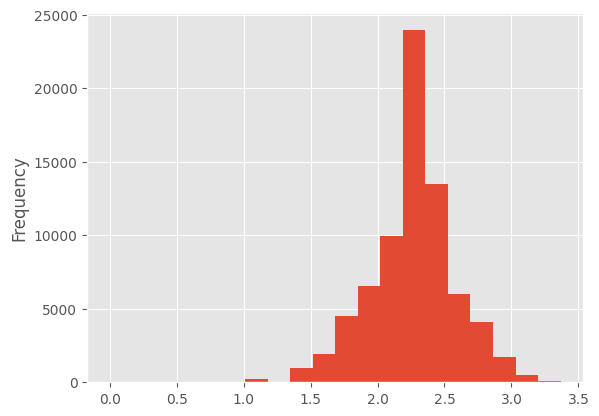

In [ ]:
np.log(train_df['Age']).plot.hist(bins = 20)

In [ ]:
np.sqrt(train_df['Age'])

0        3.000000
1        2.828427
2        3.000000
3        3.316625
4        2.828427
           ...   
74046    3.162278
74047    2.449490
74048    3.162278
74049    2.828427
74050    2.449490
Name: Age, Length: 74051, dtype: float64

<Axes: ylabel='Frequency'>

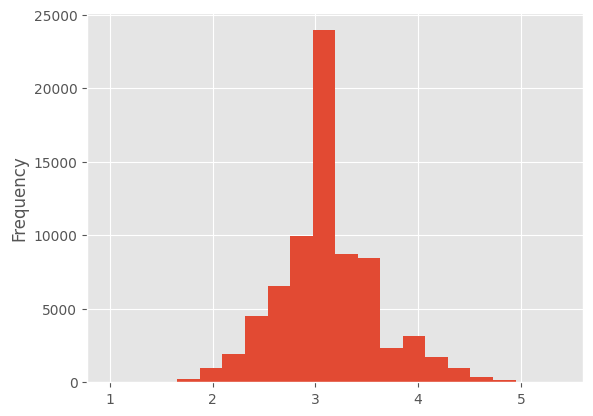

In [ ]:
# 제곱근 분포 -> 흠 가운데 맞는데 구멍잇음
np.sqrt(train_df['Age']).plot.hist(bins = 20)

-> 흠 로그가 좀 더 좌우 대칭이고 제곱근은 중심값이 딱 맞아

-> 둘 다 해보지 모

**로그 사용**

In [ ]:
train_df_le.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,37025.000000,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,21376.826729,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,18512.500000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,37025.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,55537.500000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,74050.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [ ]:
pd.options.mode.chained_assignment = None # 경고메시지 제어
train_df_le_log = train_df_le.copy()
train_df_le_log["Age_log"] = np.log(train_df_le_log["Age"])

In [ ]:
# 설명 변수와 목적 변수 지정
train_X = train_df_le_log.drop(["Age", "Age_log", "id"], axis = 1)
train_Y = train_df_le_log["Age_log"]

In [ ]:
# 모델별 예측 값 저장하기
models = [] # fold별 모델
mae = [] # fold별 mae 결과값
oof = np.zeros(len(train_X)) # 초기값 0, fold별 해당 값 갱신 (해당 데이터를 제외한 나머지 데이터를 사용하여 목적 변수를 예측한 값)

for train_index, val_index in kf.split(train_X) :
  X_train = train_X.iloc[train_index]
  X_valid = train_X.iloc[val_index]
  y_train = train_Y.iloc[train_index]
  y_valid = train_Y.iloc[val_index] # 각 인덱스를 기준으로 split된 train set과 val set 자르기

  lgb_train = lgb.Dataset(X_train, y_train) # 학습 데이터셋
  lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train) # 검증 데이터셋

  model_lgb = lgb.train(lgbm_params,
                        lgb_train,
                        valid_sets = lgb_eval,

                        num_boost_round = 100, # boosting iterate 수
                        early_stopping_rounds=20, # 조기종료를 위한 값
                        verbose_eval = 10 # 메시지 출력 간격
                        )

  y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration) # 최고 iteration을 사용한 예측값
  tmp_mae = mean_absolute_error(y_valid, y_pred) # 정확도 계산
  print(tmp_mae) # 평균절대오차

  models.append(model_lgb)
  mae.append(tmp_mae)
  oof[val_index] = y_pred

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005371 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1321
[LightGBM] [Info] Number of data points in the train set: 59240, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 2.250837
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0405741
[20]	valid_0's l2: 0.0328821
[30]	valid_0's l2: 0.0316138
[40]	valid_0's l2: 0.0312672
[50]	valid_0's l2: 0.0311457
[60]	valid_0's l2: 0.03111
[70]	valid_0's l2: 0.031084
[80]	valid_0's l2: 0.031084
[90]	valid_0's l2: 0.0310779
[100]	valid_0's l2: 0.0310725
Did not meet early stopping. Best iteration is:
[95]	valid_0's l2: 0.0310668
0.13088789470943885
[LightGBM] [Warning] Found whitespace in feature_na

In [ ]:
# mae 평균 계산
sum(mae)/len(mae)

0.1319740433173368

In [ ]:
first_mae = sum(mae)/len(mae)

In [ ]:
train_df_le.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,37025.000000,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,21376.826729,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,18512.500000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,37025.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,55537.500000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,74050.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


**제곱근 사용**

In [ ]:
pd.options.mode.chained_assignment = None # 경고메시지 제어
train_df_le_sqrt = train_df_le.copy()
train_df_le_sqrt["Age_sqrt"] = np.sqrt(train_df_le_sqrt["Age"])

In [ ]:
# 설명 변수와 목적 변수 지정
train_X = train_df_le_sqrt.drop(["Age", "Age_sqrt", "id"], axis = 1)
train_Y = train_df_le_sqrt["Age_sqrt"]

In [ ]:
# 모델별 예측 값 저장하기
models = [] # fold별 모델
mae = [] # fold별 mae 결과값
oof = np.zeros(len(train_X)) # 초기값 0, fold별 해당 값 갱신 (해당 데이터를 제외한 나머지 데이터를 사용하여 목적 변수를 예측한 값)

for train_index, val_index in kf.split(train_X) :
  X_train = train_X.iloc[train_index]
  X_valid = train_X.iloc[val_index]
  y_train = train_Y.iloc[train_index]
  y_valid = train_Y.iloc[val_index] # 각 인덱스를 기준으로 split된 train set과 val set 자르기

  lgb_train = lgb.Dataset(X_train, y_train) # 학습 데이터셋
  lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train) # 검증 데이터셋

  model_lgb = lgb.train(lgbm_params,
                        lgb_train,
                        valid_sets = lgb_eval,

                        num_boost_round = 100, # boosting iterate 수
                        early_stopping_rounds=20, # 조기종료를 위한 값
                        verbose_eval = 10 # 메시지 출력 간격
                        )

  y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration) # 최고 iteration을 사용한 예측값
  tmp_mae = mean_absolute_error(y_valid, y_pred) # 정확도 계산
  print(tmp_mae) # 평균절대오차

  models.append(model_lgb)
  mae.append(tmp_mae)
  oof[val_index] = y_pred

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1321
[LightGBM] [Info] Number of data points in the train set: 59240, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 3.119406
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.108111
[20]	valid_0's l2: 0.0902593
[30]	valid_0's l2: 0.0869888
[40]	valid_0's l2: 0.0861243
[50]	valid_0's l2: 0.0857988
[60]	valid_0's l2: 0.0857022
[70]	valid_0's l2: 0.0855864
[80]	valid_0's l2: 0.0855042
[90]	valid_0's l2: 0.0854896
[100]	valid_0's l2: 0.0854499
Did not meet early stopping. Best iteration is:
[99]	valid_0's l2: 0.0854472
0.21024851215726834
[LightGBM] [Warning] Found whitespace in feature

In [ ]:
# mae 평균 계산
sum(mae)/len(mae)

0.21228703091420545

-> 로그 쓰쟈

# 설명 변수 전처리

## 데이터 확인

In [ ]:
# 학습 데이터의 변수 유형 확인하기
train_df.dtypes

id                  int64
Sex                object
Length            float64
Diameter          float64
Height            float64
Weight            float64
Shucked Weight    float64
Viscera Weight    float64
Shell Weight      float64
Age                 int64
dtype: object

<ipython-input-46-8c08552bc5ca>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df_corr = train_df.drop(["id"], axis = 1).corr()


<Axes: >

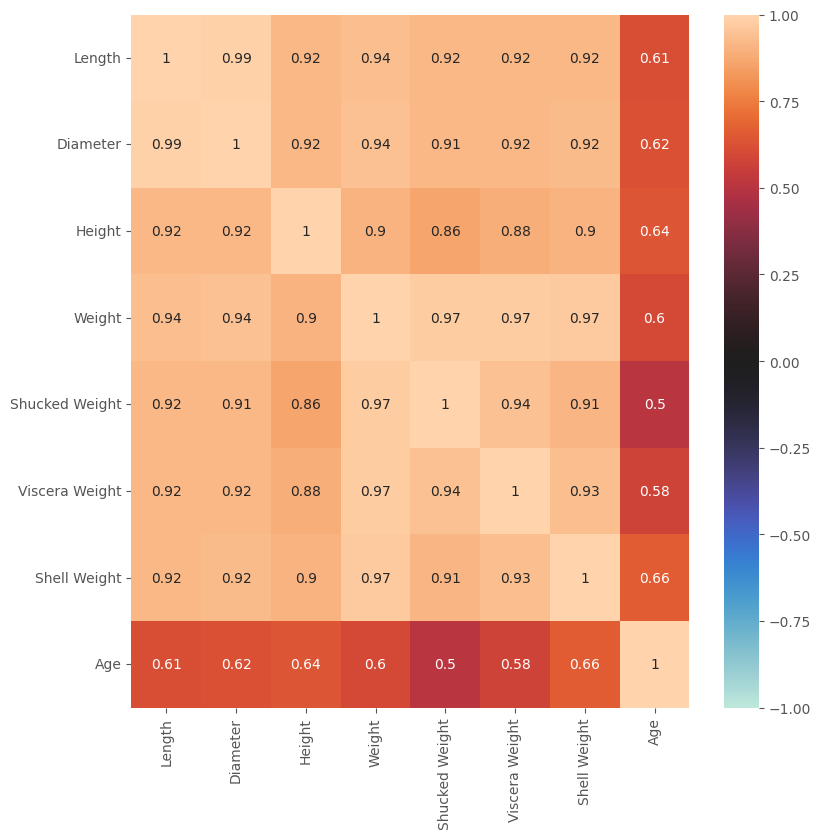

In [ ]:
# corr() : 각 변수 간 상관 계수(얼마나 직선형인가)를 계산
train_df_corr = train_df.drop(["id"], axis = 1).corr()
plt.figure(figsize = (9, 9))
sns.heatmap(train_df_corr, vmax = 1, vmin = -1, center = 0, annot = True)

-> 성별, 길이, 직경, 키, 무게, 전체 무게, 내장 무게, 껍질 무게

In [ ]:
train_df.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,37025.000000,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,21376.826729,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,18512.500000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,37025.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,55537.500000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,74050.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


## 무게 변수 처리

**무게 변수**

-> Weight : 총 무게

-> Shucked Weight : 껍질을 제외한 무게

-> Viscera Weight : 내장 무게

-> Shell Weight : 껍질 무게

=> 각각의 값이 Weight보다 작아야 하며 세 수를 더한 값이 Weight와 비슷해야 함

### 내장 무게가 전체 무게보다 큰 경우

In [ ]:
rows_with_less_weight = train_df[train_df['Weight'] < train_df['Shucked Weight']]
desired_columns = ['Weight','Shucked Weight', 'Shucked Weight', 'Shell Weight', 'Age']
print(rows_with_less_weight[desired_columns])

         Weight  Shucked Weight  Shucked Weight  Shell Weight  Age
2254   4.805240        5.003687        5.003687      1.417475    6
2296   2.990872       14.033003       14.033003      0.992232    5
10836  2.990872       14.033003       14.033003      0.893009    5
11792  2.990872       14.033003       14.033003      0.893009    5
14476  2.990872       14.033003       14.033003      0.708738    5
15817  5.783298        8.632423        8.632423      1.686795    5
22437  2.962523       12.076887       12.076887      0.850485    6
27418  2.990872       14.033003       14.033003      0.893009    7
28284  5.783298        8.150481        8.150481      1.686795    7
30353  3.727959        5.740774        5.740774      2.267960    6
32945  2.990872       14.033003       14.033003      0.893009    5
34613  2.990872       12.332033       12.332033      1.133980    7
37581  2.990872       14.033003       14.033003      0.992232    7
42499  0.595340        0.708738        0.708738      0.368544 

In [ ]:
rows_with_less_weight = test_df[test_df['Weight'] < test_df['Shucked Weight']]
desired_columns = ['Weight','Shucked Weight', 'Shucked Weight', 'Shell Weight']
print(rows_with_less_weight[desired_columns])

         Weight  Shucked Weight  Shucked Weight  Shell Weight
1934   2.721552       12.062712       12.062712      0.893009
2958   3.926406        5.740774        5.740774      2.168737
4845   3.727959        5.740774        5.740774      3.486988
6626   2.849125       15.776497       15.776497      0.992232
7171   5.712424       10.163296       10.163296      1.984465
14418  2.990872       14.033003       14.033003      1.133980
16196  2.990872       14.033003       14.033003      0.992232
17363  2.990872       14.033003       14.033003      0.566990
19835  2.962523       12.020188       12.020188      0.850485
22081  5.783298        8.632423        8.632423      1.686795
29774  2.764076        5.740774        5.740774      2.764076
36294  3.727959        5.740774        5.740774      3.486988
38555  2.990872       12.332033       12.332033      1.133980
40083  3.727959        5.740774        5.740774      3.486988
40588  2.990872       14.033003       14.033003      0.992232
41050  4

In [ ]:
all_df = all_df[(all_df['Weight'] > all_df['Shucked Weight']) | (all_df['Age'].isnull())]

### 껍질을 제외한 무게가 전체 무게보다 큰 경우

In [ ]:
rows_with_less_weight = train_df[train_df['Weight'] < train_df['Shell Weight']]
desired_columns = ['Weight','Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Age']
print(rows_with_less_weight[desired_columns])

        Weight  Shucked Weight  Viscera Weight  Shell Weight  Age
1200  3.798833        1.630096        0.807961        9.9365    6


In [ ]:
rows_with_less_weight = test_df[test_df['Weight'] < test_df['Shell Weight']]
desired_columns = ['Weight','Shucked Weight', 'Shell Weight', 'Shell Weight']
print(rows_with_less_weight[desired_columns])

         Weight  Shucked Weight  Shell Weight  Shell Weight
9726   3.869707        1.630096      9.936500      9.936500
41050  4.918638       23.331639      9.199413      9.199413


In [ ]:
all_df = all_df[(all_df['Weight'] > all_df['Shell Weight']) | (all_df['Age'].isnull())]

### 껍질 무게가 전체 무게보다 큰 경우

In [ ]:
rows_with_less_weight = train_df[train_df['Weight'] < train_df['Shell Weight']]
desired_columns = ['Weight','Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Age']
print(rows_with_less_weight[desired_columns])

        Weight  Shucked Weight  Viscera Weight  Shell Weight  Age
1200  3.798833        1.630096        0.807961        9.9365    6


In [ ]:
rows_with_less_weight = test_df[test_df['Weight'] < test_df['Shell Weight']]
desired_columns = [ 'Weight','Shucked Weight', 'Viscera Weight', 'Shell Weight']
print(rows_with_less_weight[desired_columns])

         Weight  Shucked Weight  Viscera Weight  Shell Weight
9726   3.869707        1.630096        0.807961      9.936500
41050  4.918638       23.331639       10.560189      9.199413


In [ ]:
all_df = all_df[(all_df['Weight'] > all_df['Shell Weight']) | (all_df['Age'].isnull())]

### 더한 값이 Weight와 큰 차이를 지니는 경우 -> 하지 말아보쟈

In [ ]:
all_df

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,2,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9.0
1,1,2,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8.0
2,2,0,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9.0
3,3,1,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11.0
4,4,2,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8.0
...,...,...,...,...,...,...,...,...,...,...
123414,123414,1,1.3000,1.0375,0.3250,16.315137,6.690482,5.173784,3.756309,NaN
123415,123415,2,1.0375,0.7625,0.2625,10.276694,4.436697,1.998640,3.543687,NaN
123416,123416,1,1.4875,1.1625,0.3625,31.382897,11.396499,6.846404,8.788345,NaN
123417,123417,1,1.2375,0.9500,0.2875,15.663099,6.095142,3.727959,4.961163,NaN


**train**

In [ ]:
train_df['Total Weight'] = train_df['Shucked Weight'] + train_df['Viscera Weight'] + train_df['Shell Weight']

In [ ]:
train_df['Weight Err'] = (train_df['Weight'] - train_df['Total Weight']) / train_df['Weight'] * 100

-> "차이가 실제 무게의 몇배나 되는지" 비율로 오차값 사용

In [ ]:
train_df.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Total Weight,Weight Err
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,37025.000000,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806,21.886526,5.858524
std,21376.826729,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189,11.711152,8.845704
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000,0.113398,-420.379147
25%,18512.500000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000,12.714751,2.823832
50%,37025.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000,22.169309,5.879791
75%,55537.500000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000,30.319790,9.364020
max,74050.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000,76.331029,69.724771


-> 흠 판단의 척도를 몇으로 잡아야 할까

-> 표준편차 +-3 정도면 25정도인가

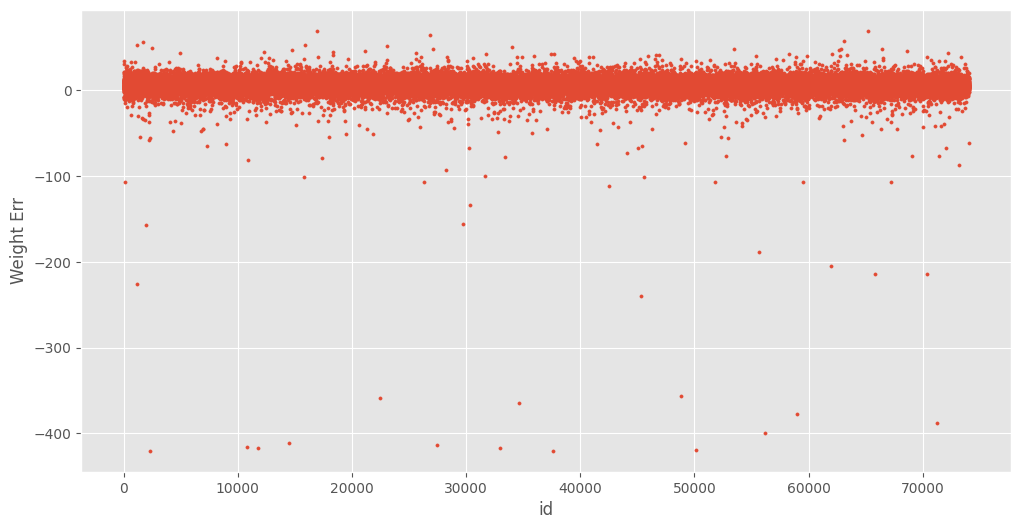

In [ ]:
# 가로축 상관 없으니 세로의 퍼짐 정도만 보렴
plt.figure(figsize=(12, 6))
plt.scatter(train_df['id'], train_df['Weight Err'], s=5)
plt.xlabel('id')
plt.ylabel('Weight Err')
plt.show()

**test**

**더한 값이 Weight와 큰 차이를 지니는 경우**

In [ ]:
test_df['Total Weight'] = test_df['Shucked Weight'] + test_df['Viscera Weight'] + test_df['Shell Weight']

In [ ]:
test_df['Weight Err'] = (test_df['Weight'] - test_df['Total Weight']) / test_df['Weight'] * 100

In [ ]:
test_df.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Total Weight,Weight Err
count,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000
mean,98734.500000,1.319795,1.026357,0.348693,23.464627,10.130220,5.072615,6.745876,21.948711,5.904630
std,14251.458382,0.286950,0.236593,0.092259,12.641703,5.611779,2.791563,3.575650,11.694318,9.482547
min,74051.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,0.085048,-776.080692
25%,86392.750000,1.162500,0.887500,0.300000,13.536886,5.740774,2.877474,3.968930,12.813974,2.818609
50%,98734.500000,1.387500,1.075000,0.362500,23.813580,9.979024,4.989512,6.945627,22.226008,5.895337
75%,111076.250000,1.537500,1.200000,0.412500,32.290081,14.047177,7.016501,9.171063,30.390664,9.475487
max,123418.000000,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,76.160932,81.690141


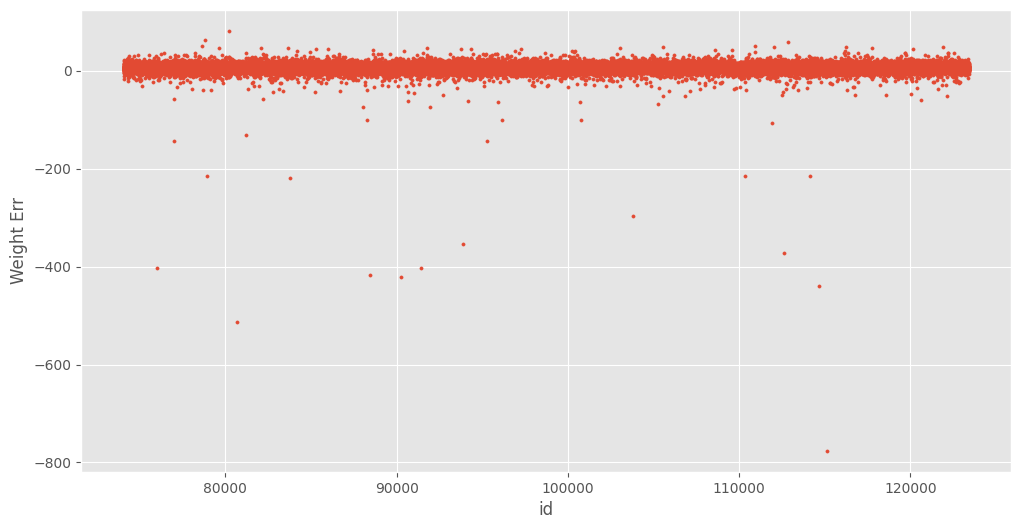

In [ ]:
# 가로축 상관 없으니 세로의 퍼짐 정도만 보렴
plt.figure(figsize=(12, 6))
plt.scatter(test_df['id'], test_df['Weight Err'], s=5)
plt.xlabel('id')
plt.ylabel('Weight Err')
plt.show()

**all_df**

In [ ]:
threshold = 200

In [ ]:
all_df['Total Weight'] = all_df['Shucked Weight'] + all_df['Viscera Weight'] + all_df['Shell Weight']

In [ ]:
all_df['Weight Err'] = (all_df['Weight'] - all_df['Total Weight']) / all_df['Weight'] * 100

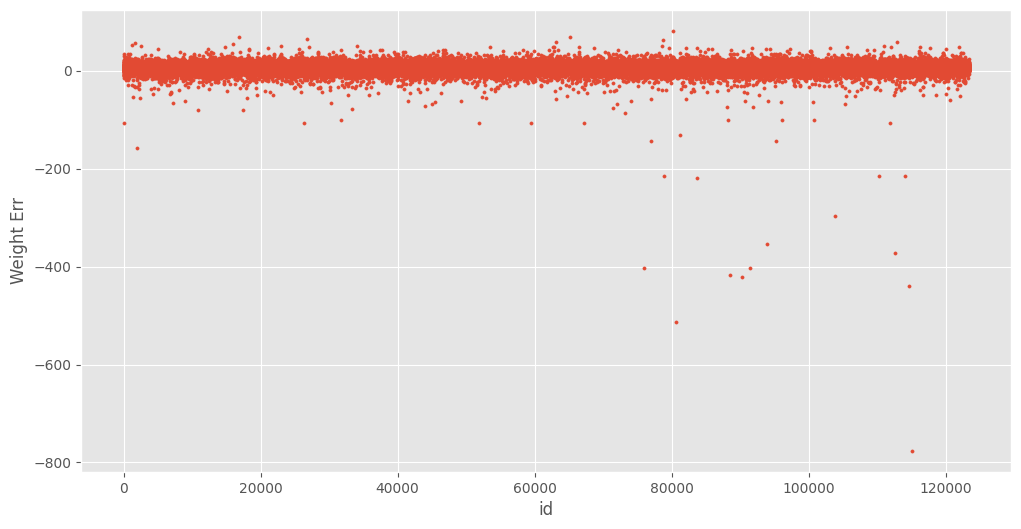

In [ ]:
# 가로축 상관 없으니 세로의 퍼짐 정도만 보렴
plt.figure(figsize=(12, 6))
plt.scatter(all_df['id'], all_df['Weight Err'], s=5)
plt.xlabel('id')
plt.ylabel('Weight Err')
plt.show()

In [ ]:
all_df.shape[0]

123390

In [ ]:
# train에서만 !
'''
all_df = all_df[(all_df["Weight Err"].abs() <= threshold) | (all_df['Age'].isnull())]
all_df.shape[0]
'''

'\nall_df = all_df[(all_df["Weight Err"].abs() <= threshold) | (all_df[\'Age\'].isnull())]\nall_df.shape[0]\n'

In [ ]:
all_df = all_df.drop(["Weight Err", "Total Weight"], axis = 1)
train_df = train_df.drop(["Weight Err", "Total Weight"], axis = 1)
test_df = test_df.drop(["Weight Err", "Total Weight"], axis = 1)

## 길이 변수 처리

**길이 변수**

-> Length : 총 길이

-> Diameter : 둘레

-> Height : 높이

## 변수별 이상치 제거

<Axes: xlabel='Shell Weight', ylabel='Age'>

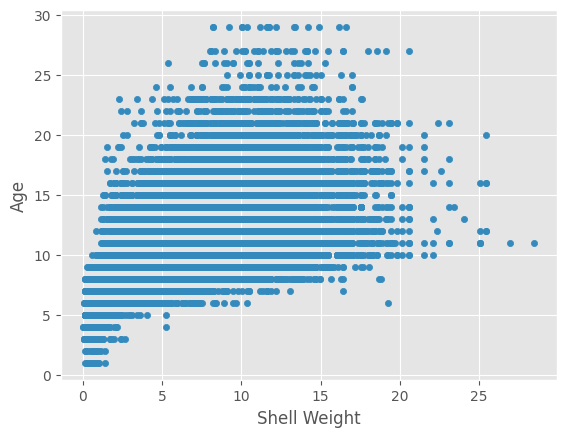

In [ ]:
all_df.plot.scatter(x = "Shell Weight", y = "Age")

<Axes: xlabel='Shucked Weight', ylabel='Age'>

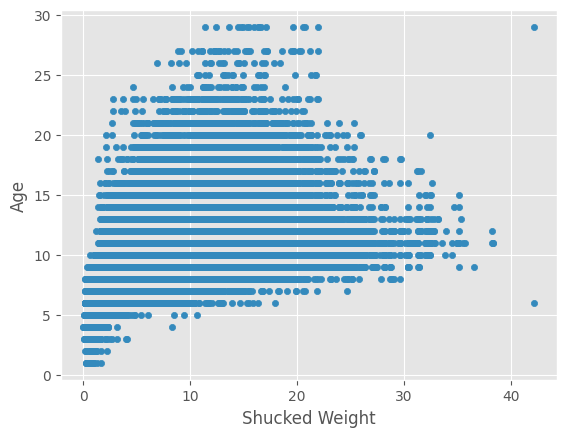

In [ ]:
all_df.plot.scatter(x = "Shucked Weight", y = "Age")

-> 40 이상

<Axes: xlabel='Height', ylabel='Age'>

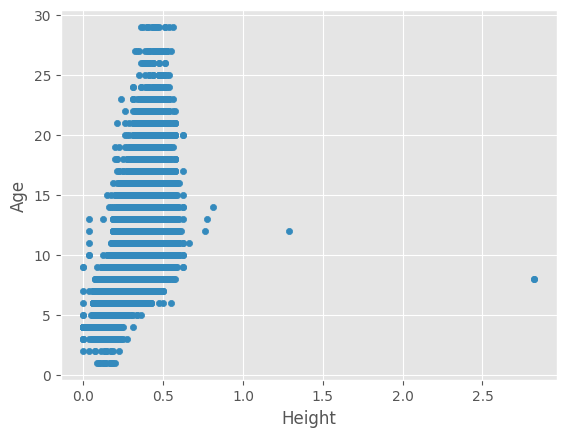

In [ ]:
all_df.plot.scatter(x = "Height", y = "Age")

-> 1.0 아님 1.5이상

<Axes: xlabel='Weight', ylabel='Age'>

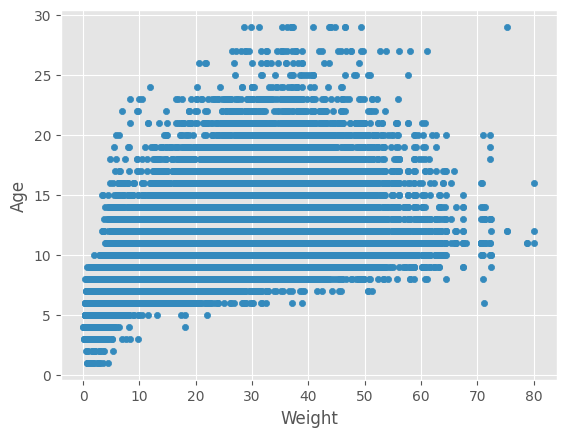

In [ ]:
all_df.plot.scatter(x = "Weight", y = "Age")

<Axes: xlabel='Viscera Weight', ylabel='Age'>

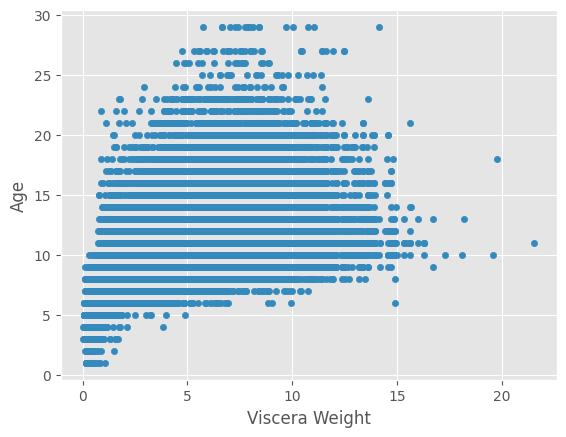

In [ ]:
all_df.plot.scatter(x = "Viscera Weight", y = "Age")

<Axes: xlabel='Length', ylabel='Age'>

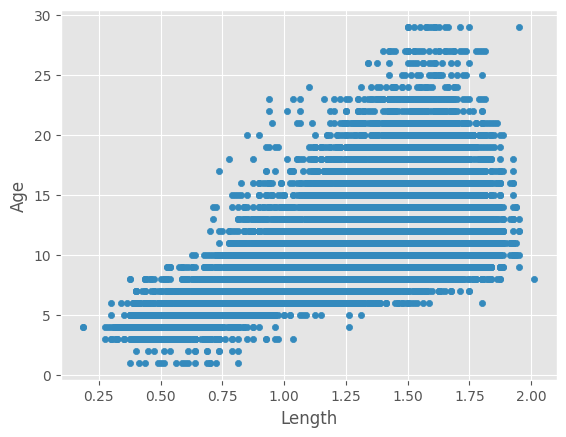

In [ ]:
all_df.plot.scatter(x = "Length", y = "Age")

<Axes: xlabel='Diameter', ylabel='Age'>

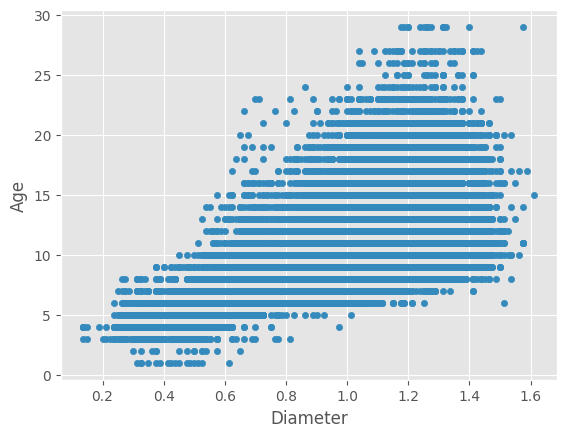

In [ ]:
all_df.plot.scatter(x = "Diameter", y = "Age")

In [ ]:
# 역치를 마련하고, 이상치 제외!
# 이때, test data는 이상치라 해도 제외하면 안됨
all_df = all_df[(all_df['Shucked Weight'] < 40) | (all_df['Age'].isnull())]
all_df = all_df[(all_df['Height'] < 1.0) | (all_df['Age'].isnull())]
all_df = all_df[(all_df['Height'] != 0.0) | (all_df['Age'].isnull())] # 0인 Height 제외

# 이상치 처리

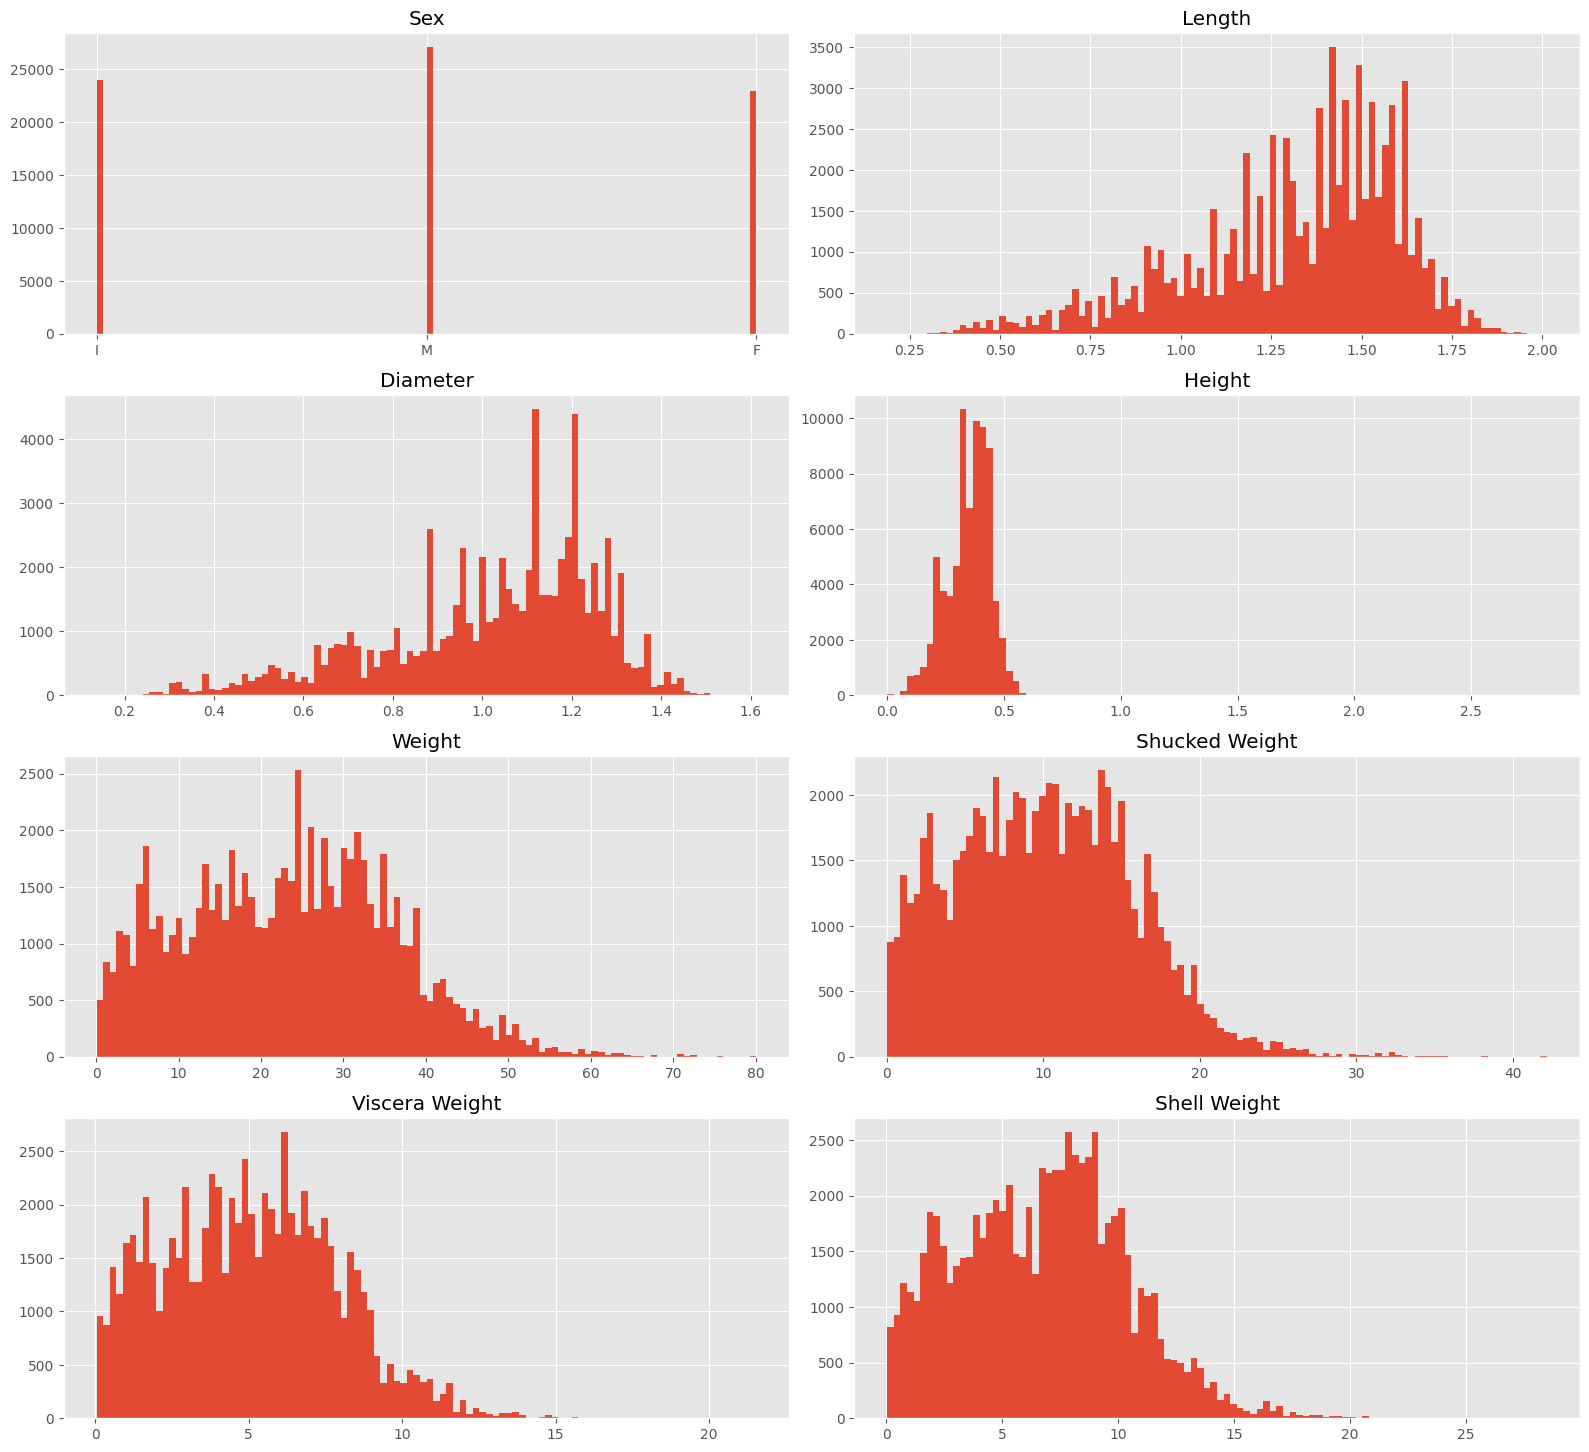

In [ ]:
figure = plt.figure(figsize=(16, 18))
explane_df = train_df.drop(['id', 'Age'], axis=1).columns

count = 0
for i in range(len(explane_df)):
    feat_name = explane_df[i]
    plt.subplot(5, 2, count+1)
    plt.hist(train_df[feat_name], bins=100)
    plt.title(f'{feat_name}')
    count += 1
figure.tight_layout(h_pad=1.0, w_pad=0.8)
plt.show()

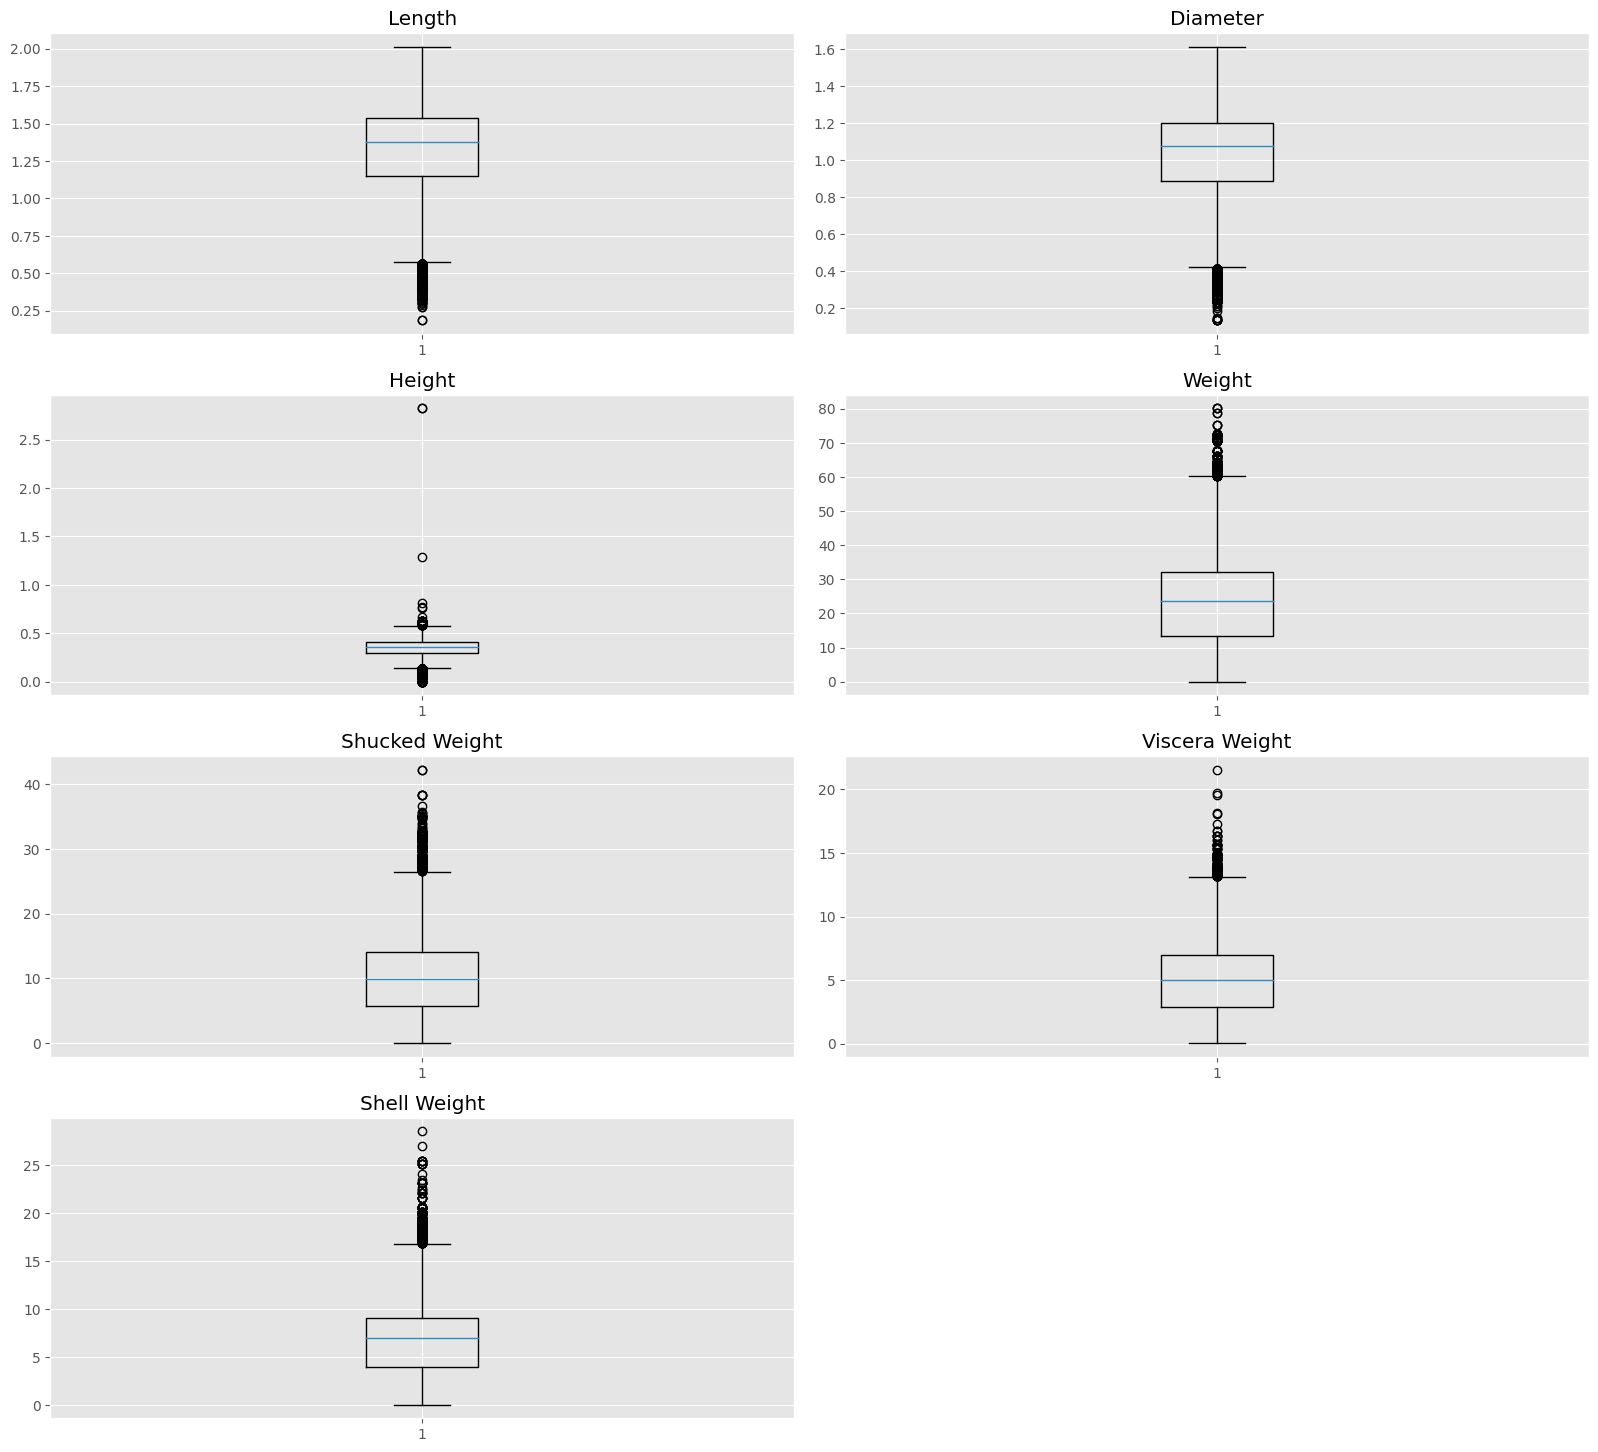

In [ ]:
figure = plt.figure(figsize=(16, 18))
explane_df = train_df.drop(['id', 'Age', 'Sex'], axis=1).columns

for i in range(len(explane_df)):
    feat_name = explane_df[i]
    plt.subplot(5, 2, i+1)
    plt.boxplot(train_df[feat_name])
    plt.title(f'{feat_name}')

plt.tight_layout(h_pad=1.0, w_pad=0.8)
plt.show()

In [ ]:
all_df = all_df[(all_df["Length"]>0.25) | (all_df['Age'].isnull())]
all_df = all_df[(all_df["Diameter"]>0.18) | (all_df['Age'].isnull())]
all_df = all_df[(all_df["Height"]<0.65) | (all_df['Age'].isnull())]
all_df = all_df[(all_df["Weight"]<75) | (all_df['Age'].isnull())]
all_df = all_df[(all_df["Shucked Weight"]<38) | (all_df['Age'].isnull())]
all_df = all_df[(all_df["Viscera Weight"]<18) | (all_df['Age'].isnull())]
all_df = all_df[(all_df["Shell Weight"]<25) | (all_df['Age'].isnull())]

In [ ]:
train_df_test = all_df[~all_df["Age"].isnull()]
test_df_test = all_df[all_df["Age"].isnull()]

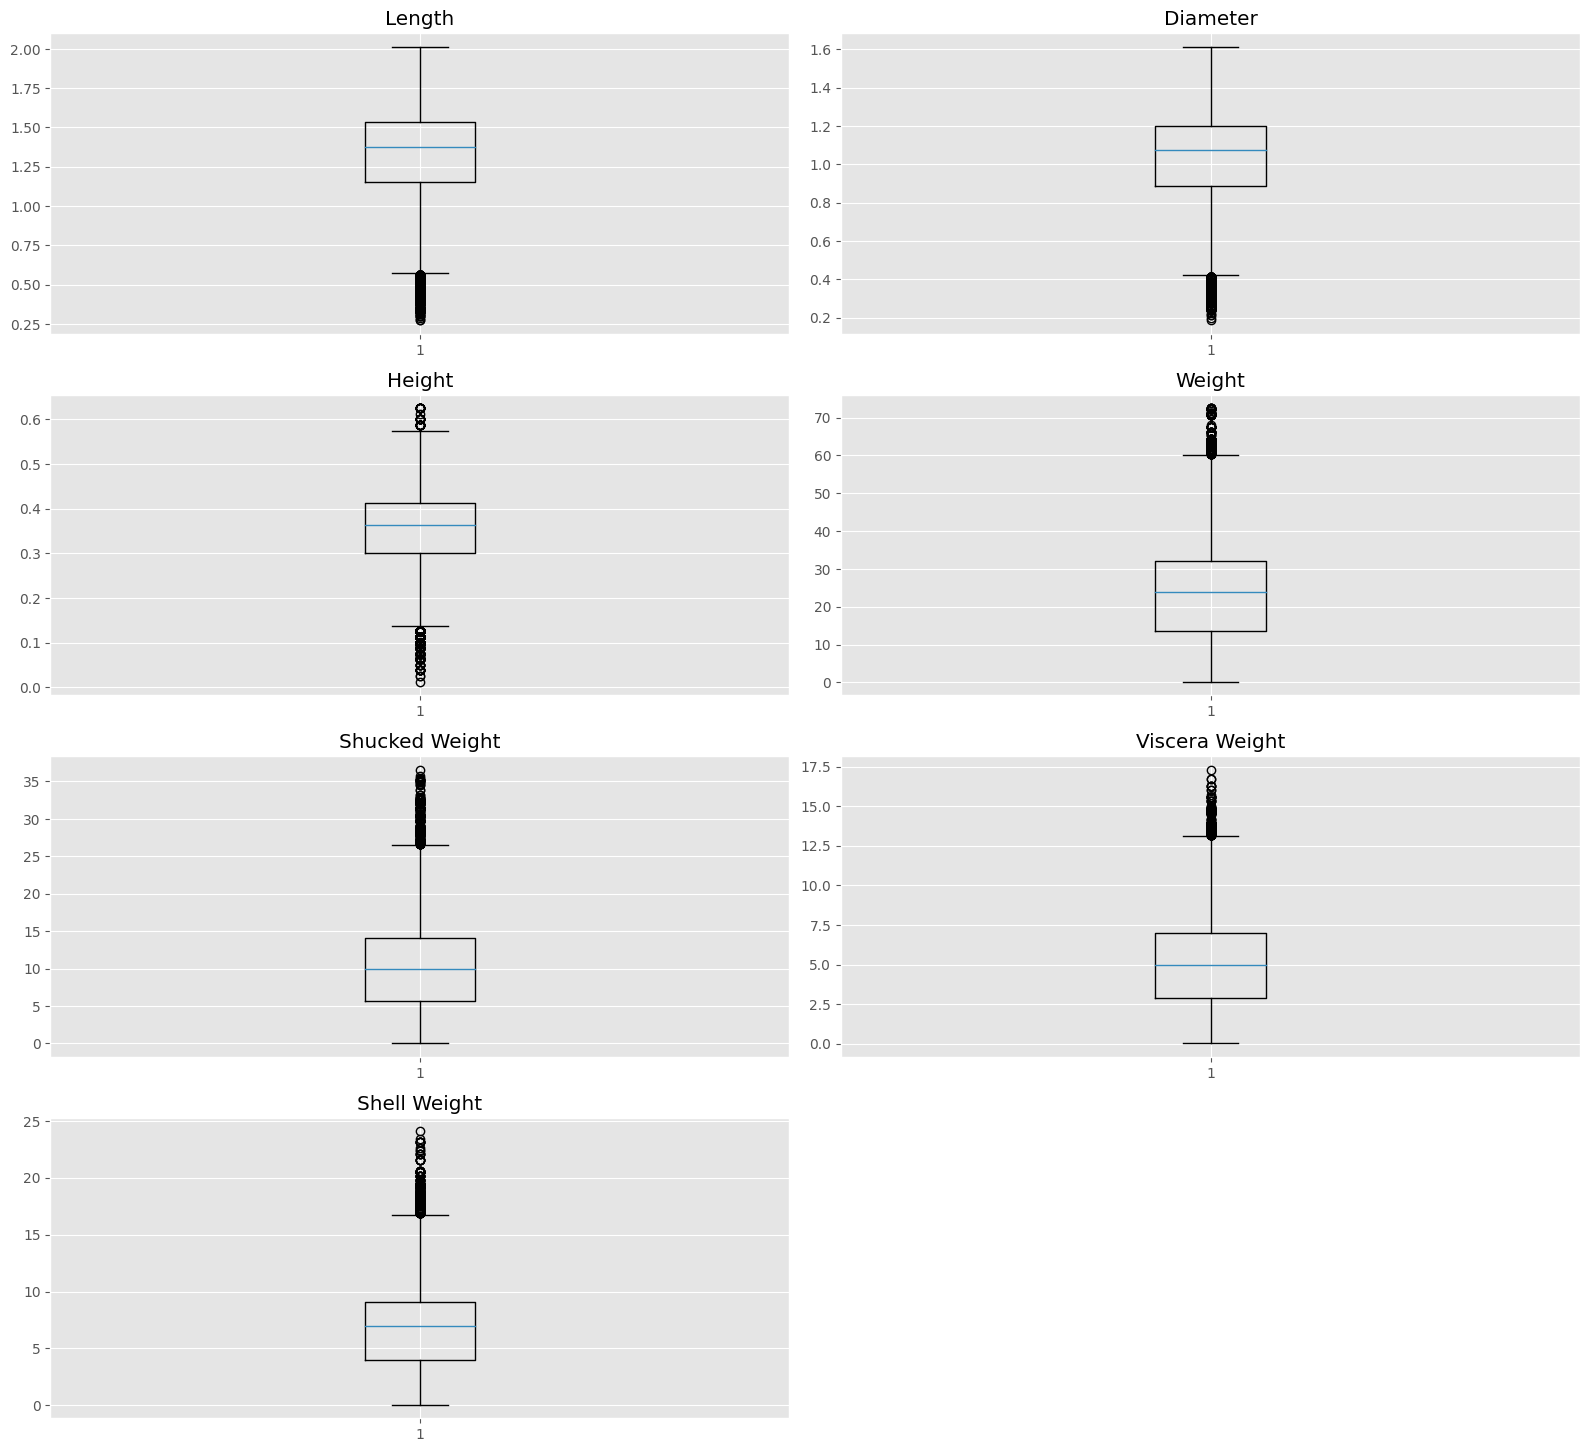

In [ ]:
figure = plt.figure(figsize=(16, 18))
explane_df = train_df_test.drop(['id', 'Age', 'Sex'], axis=1).columns

for i in range(len(explane_df)):
    feat_name = explane_df[i]
    plt.subplot(5, 2, i+1)
    plt.boxplot(train_df_test[feat_name])
    plt.title(f'{feat_name}')

plt.tight_layout(h_pad=1.0, w_pad=0.8)
plt.show()

# 설명변수 전처리 후 오차 확인

In [ ]:
pd.options.mode.chained_assignment = None # 경고메시지 제어
train_df_le["Age_log"] = np.log(train_df_le["Age"])

In [ ]:
# 설명 변수와 목적 변수 지정
train_df_le = all_df[~all_df["Age"].isnull()]
test_df_le = all_df[all_df["Age"].isnull()]

train_df_le["Age_log"] = np.log(train_df_le["Age"])

train_X = train_df_le.drop(["Age", "Age_log", "id"], axis = 1)
train_Y = train_df_le["Age_log"]

In [ ]:
# 모델별 예측 값 저장하기
models = [] # fold별 모델
mae = [] # fold별 mae 결과값
oof = np.zeros(len(train_X)) # 초기값 0, fold별 해당 값 갱신 (해당 데이터를 제외한 나머지 데이터를 사용하여 목적 변수를 예측한 값)

for train_index, val_index in kf.split(train_X) :
  X_train = train_X.iloc[train_index]
  X_valid = train_X.iloc[val_index]
  y_train = train_Y.iloc[train_index]
  y_valid = train_Y.iloc[val_index] # 각 인덱스를 기준으로 split된 train set과 val set 자르기

  lgb_train = lgb.Dataset(X_train, y_train) # 학습 데이터셋
  lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train) # 검증 데이터셋

  model_lgb = lgb.train(lgbm_params,
                        lgb_train,
                        valid_sets = lgb_eval,

                        num_boost_round = 100, # boosting iterate 수
                        early_stopping_rounds=20, # 조기종료를 위한 값
                        verbose_eval = 10 # 메시지 출력 간격
                        )

  y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration) # 최고 iteration을 사용한 예측값
  tmp_mae = mean_absolute_error(y_valid, y_pred) # 정확도 계산
  print(tmp_mae) # 평균절대오차

  models.append(model_lgb)
  mae.append(tmp_mae)
  oof[val_index] = y_pred

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.086523 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1316
[LightGBM] [Info] Number of data points in the train set: 59167, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 2.251226
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0402676
[20]	valid_0's l2: 0.0326814
[30]	valid_0's l2: 0.0314147
[40]	valid_0's l2: 0.0310776
[50]	valid_0's l2: 0.0309742
[60]	valid_0's l2: 0.0309158
[70]	valid_0's l2: 0.0308932
[80]	valid_0's l2: 0.0309082
[90]	valid_0's l2: 0.0309185
Early stopping, best iteration is:
[71]	valid_0's l2: 0.0308854
0.13058281336973637
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM]

In [ ]:
# mae 평균 계산
sum(mae)/len(mae)

0.13195780568926968

In [ ]:
second_mae = sum(mae)/len(mae)

In [ ]:
first_mae - sum(mae)/len(mae)

1.6237628067128362e-05

<Axes: >

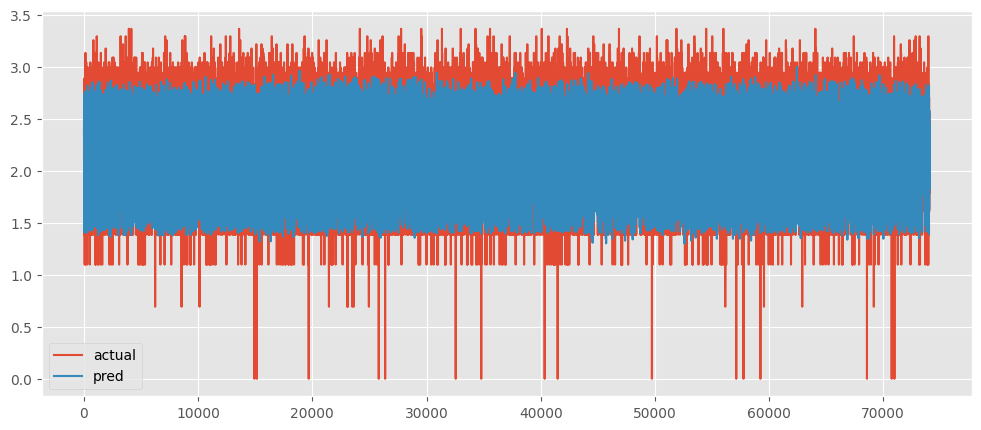

In [ ]:
# 현제 예측 값과 실제 값 차이 확인하기
actual_pred_df = pd.DataFrame({
    "actual" : train_Y,
    "pred" : oof
})
actual_pred_df.plot(figsize = (12,5))

# 하이퍼파라미터 최적화

In [ ]:
# 학습 데이터 및 검증 데이터 작성
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size = 0.4, random_state = 1234, shuffle = False, stratify = None)

In [ ]:
# 하이퍼파라미터 최적화
# 이때, 사용하는 모델의 사이트에 접속하여 각 하이퍼파라미터의 의미 및 초기값을 참고하는 것이 좋음
def objective(trial) :
  params = {
      "objective" : "regression",
      "random_seed" : 1234,
      "learning_rate" : 0.05,
      "n_estimators" : 1000,
      "num_leaves" : trial.suggest_int("num_leaves", 4, 64),
      "max_bin" : trial.suggest_int("max_bin", 50, 200),
      "bagging_fraction" : trial.suggest_uniform("bagging_fraction", 0.4, 0.9),
      "bagging_freq" : trial.suggest_int("bagging_freq", 1, 10),
      "feature_fraction" : trial.suggest_uniform("feature_fraction", 0.4, 0.9),
      "min_data_in_leaf" : trial.suggest_int("min_data_in_leaf", 2, 16),
      "min_sum_hessian_in_leaf" : trial.suggest_int("min_sum_hessian_in_leaf", 1, 10),
  }

  lgb_train = lgb.Dataset(X_train, y_train)
  lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train)

  model_lgb = lgb.train(params,
                        lgb_train,
                        valid_sets = lgb_eval,
                        num_boost_round = 100,
                        early_stopping_rounds = 20,
                        verbose_eval = 10,
                        )
  y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration)
  score = mean_absolute_error(y_valid, y_pred) # 정확도 계산
  return score

In [ ]:
'''
study = optuna.create_study(sampler = optuna.samplers.RandomSampler(seed = 0))
study.optimize(objective, n_trials = 50)
study.best_params
'''

'\nstudy = optuna.create_study(sampler = optuna.samplers.RandomSampler(seed = 0))\nstudy.optimize(objective, n_trials = 50)\nstudy.best_params\n'

In [ ]:
lgbm_params = {
      "objective" : "regression",
      "random_seed" : 1234,
      "learning_rate" : 0.05,
      "n_estimators" : 1000,
      "num_leaves": 45,
      "max_bin": 181,
      "bagging_fraction": 0.6100376848953053,
      "bagging_freq": 3,
      "feature_fraction": 0.8331911629643146,
      "min_data_in_leaf": 11,
      "min_sum_hessian_in_leaf": 8
  }

In [ ]:
pd.options.mode.chained_assignment = None # 경고메시지 제어
train_df_le["Age_log"] = np.log(train_df_le["Age"])

In [ ]:
# 설명 변수와 목적 변수 지정
train_df_le = all_df[~all_df["Age"].isnull()]
test_df_le = all_df[all_df["Age"].isnull()]

train_df_le["Age_log"] = np.log(train_df_le["Age"])

train_X = train_df_le.drop(["Age", "Age_log", "id"], axis = 1)
train_Y = train_df_le["Age_log"]

In [ ]:
# 모델별 예측 값 저장하기
models = [] # fold별 모델
mae = [] # fold별 mae 결과값
oof = np.zeros(len(train_X)) # 초기값 0, fold별 해당 값 갱신 (해당 데이터를 제외한 나머지 데이터를 사용하여 목적 변수를 예측한 값)

for train_index, val_index in kf.split(train_X) :
  X_train = train_X.iloc[train_index]
  X_valid = train_X.iloc[val_index]
  y_train = train_Y.iloc[train_index]
  y_valid = train_Y.iloc[val_index] # 각 인덱스를 기준으로 split된 train set과 val set 자르기

  lgb_train = lgb.Dataset(X_train, y_train) # 학습 데이터셋
  lgb_eval = lgb.Dataset(X_valid, y_valid, reference = lgb_train) # 검증 데이터셋

  model_lgb = lgb.train(lgbm_params,
                        lgb_train,
                        valid_sets = lgb_eval,

                        num_boost_round = 100, # boosting iterate 수
                        early_stopping_rounds=20, # 조기종료를 위한 값
                        verbose_eval = 10 # 메시지 출력 간격
                        )

  y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration) # 최고 iteration을 사용한 예측값
  tmp_mae = mean_absolute_error(y_valid, y_pred) # 정확도 계산
  print(tmp_mae) # 평균절대오차

  models.append(model_lgb)
  mae.append(tmp_mae)
  oof[val_index] = y_pred

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 59167, number of used features: 8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 2.251226
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0557057
[20]	valid_0's l2: 0.0403639
[30]	valid_0's l2: 0.0346313
[40]	valid_0's l2: 0.032429
[50]	valid_0's l2: 0.0315173
[60]	valid_0's l2: 0.0311457
[70]	valid_0's l2: 0.0309746
[80]	valid_0's l2: 0.0309212
[90]	valid_0's l2: 0.0308688
[100]	valid_0's l2: 0.03082
[110]	valid_0's l2: 0.0308157
[120]	valid_0's l2: 0.0308093
[130]	valid_0's l2: 0.0308249
Early stopping, best iteration is:
[119]	valid_0's l2: 0.

In [ ]:
# mae 평균 계산
sum(mae)/len(mae)

0.131871446247136

In [ ]:
third_mae = sum(mae)/len(mae)

In [ ]:
first_mae - sum(mae)/len(mae)

0.00010259707020079945

In [ ]:
second_mae - sum(mae)/len(mae)

8.635944213367108e-05

<Axes: >

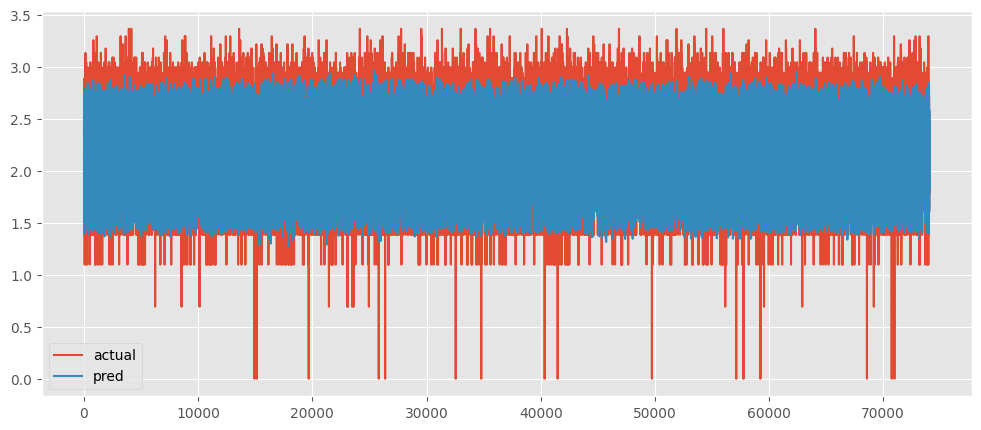

In [ ]:
# 현제 예측 값과 실제 값 차이 확인하기
actual_pred_df = pd.DataFrame({
    "actual" : train_Y,
    "pred" : oof
})
actual_pred_df.plot(figsize = (12,5))

In [ ]:
# 테스트 데이터 준비
test_X = test_df_le.drop(["Age", "id"], axis = 1)

In [ ]:
# 학습 모델을 사용하여 테스트 데이터의 목적 변수 예측하기
preds = []

for model in models :
  pred = model.predict(test_X)
  preds.append(pred)

In [ ]:
preds_array = np.array(preds)
preds_mean = np.mean(preds_array, axis = 0)

In [ ]:
# 예측 값을 원래 스케일로 되돌리기
preds_exp = np.exp(preds_mean)
len(preds_exp)

49368

In [ ]:
# 예측값을 사용하여 submission 파일 작성하기
submission["Age"] = preds_exp

In [ ]:
# csv 파일로 변환
submission.to_csv("경로/파일명.csv", index = False)

# 앙상블

### 랜덤 포레스트 사용

-> 여기는 결측치 없음 !

In [ ]:
# 설명 변수와 목적 변수 지정
train_df_le = all_df[~all_df["Age"].isnull()]
test_df_le = all_df[all_df["Age"].isnull()]

train_df_le["Age_log"] = np.log(train_df_le["Age"])

train_X = train_df_le.drop(["Age", "Age_log", "id"], axis = 1)
train_Y = train_df_le["Age_log"]

In [ ]:
fold = 5
kf = KFold(n_splits = folds)

In [ ]:
# 모델별 예측 값 저장
models_rf = [] # fold별 모델
maes_rf = [] # fold별 mae 결과값
oof_rf = np.zeros(len(train_X)) # 초기값 0, fold별 해당 값 갱신 (해당 데이터를 제외한 나머지 데이터를 사용하여 목적 변수를 예측한 값)

for train_index, val_index in kf.split(train_X) :
  X_train = train_X.iloc[train_index]
  X_valid = train_X.iloc[val_index]
  y_train = train_Y.iloc[train_index]
  y_valid = train_Y.iloc[val_index] # 각 인덱스를 기준으로 split된 train set과 val set 자르기

  model_rf = rf(
      n_estimators = 50,
      random_state = 1234
  )

  model_rf.fit(X_train, y_train)
  y_pred = model_rf.predict(X_valid)

  tmp_mae = mean_absolute_error(y_valid, y_pred) # 정확도 계산
  print(tmp_mae) # 평균제곱오차 출력

  models_rf.append(model_rf)
  maes_rf.append(tmp_mae)
  oof_rf[val_index] = y_pred

0.13711804832626673
0.13787744523796788
0.13770667818547394
0.13872517951138147
0.13883274543719754


<Axes: >

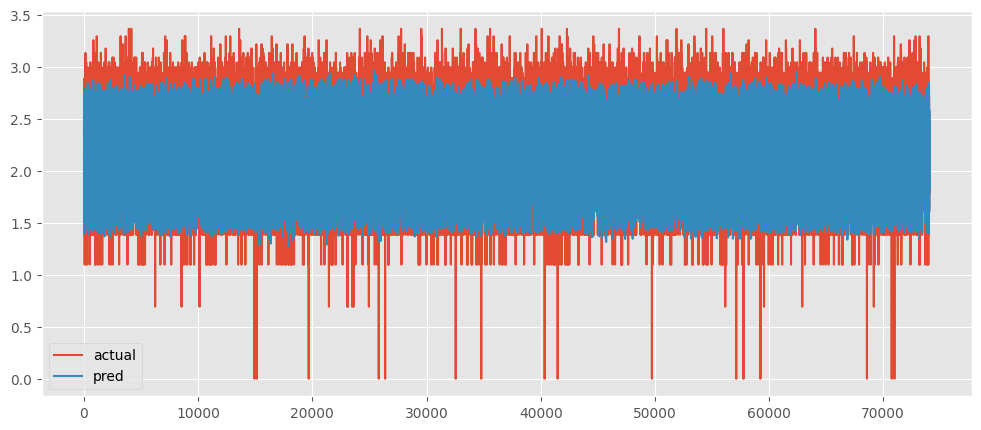

In [ ]:
# 현제 예측 값과 실제 값 차이 확인하기
actual_pred_df = pd.DataFrame({
    "actual" : train_Y,
    "pred" : oof
})
actual_pred_df.plot(figsize = (12,5))

In [ ]:
sum(maes_rf)/len(maes_rf)

0.1380520193396575

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size = 0.4, random_state = 1234, shuffle = False, stratify = None)

In [ ]:
def objective(trial):
    # 하이퍼파라미터 탐색 범위 설정
    rf_params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
        'max_leaf_nodes' : trial.suggest_int('max_leaf_nodes', 2, 1000),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'random_state': 42
    }

    # 랜덤 포레스트 모델 초기화
    model = rf(**rf_params)

    # 모델 훈련
    model.fit(X_train, y_train)

    # 검증 데이터에 대한 예측 수행
    y_pred = model.predict(X_valid)

    # 평균 절대 오차 계산
    score = mean_absolute_error(y_valid, y_pred)

    return score


In [ ]:
'''
study = optuna.create_study(direction='minimize', sampler = optuna.samplers.RandomSampler(seed=0))
study.optimize(objective, n_trials = 50)
study.best_params
'''

"\nstudy = optuna.create_study(direction='minimize', sampler = optuna.samplers.RandomSampler(seed=0))\nstudy.optimize(objective, n_trials = 50)\nstudy.best_params\n"

In [ ]:
# 설명 변수와 목적 변수 지정
train_df_le = all_df[~all_df["Age"].isnull()]
test_df_le = all_df[all_df["Age"].isnull()]

train_df_le["Age_log"] = np.log(train_df_le["Age"])

train_X = train_df_le.drop(["Age", "Age_log", "id"], axis = 1)
train_Y = train_df_le["Age_log"]

In [ ]:
fold = 5
kf = KFold(n_splits = folds)

In [ ]:
# 모델별 예측 값 저장
models_rf = [] # fold별 모델
maes_rf = [] # fold별 mae 결과값
oof_rf = np.zeros(len(train_X)) # 초기값 0, fold별 해당 값 갱신 (해당 데이터를 제외한 나머지 데이터를 사용하여 목적 변수를 예측한 값)

for train_index, val_index in kf.split(train_X) :
  X_train = train_X.iloc[train_index]
  X_valid = train_X.iloc[val_index]
  y_train = train_Y.iloc[train_index]
  y_valid = train_Y.iloc[val_index] # 각 인덱스를 기준으로 split된 train set과 val set 자르기

  model_rf = rf(
      n_estimators = 447,
      max_depth = 9,
      max_features = 'auto',
      max_leaf_nodes = 806,
      min_samples_split = 2,
      min_samples_leaf = 10,
      random_state = 1234
  )

  model_rf.fit(X_train, y_train)
  y_pred = model_rf.predict(X_valid)

  tmp_mae = mean_absolute_error(y_valid, y_pred) # 정확도 계산
  print(tmp_mae) # 평균제곱오차 출력

  models_rf.append(model_rf)
  maes_rf.append(tmp_mae)
  oof_rf[val_index] = y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


0.13149023168414029


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


0.13319157539307988


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


0.1319312623108643


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


0.13391745734727858


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


0.13338897895351134


In [ ]:
sum(maes_rf)/len(maes_rf)

0.13278390113777488

In [ ]:
firth_mae = sum(maes_rf)/len(maes_rf)

In [ ]:
third_mae - sum(maes_rf)/len(maes_rf)

-0.0009124548906388752

In [ ]:
first_mae - sum(maes_rf)/len(maes_rf)

-0.0008098578204380757

In [ ]:
second_mae - sum(maes_rf)/len(maes_rf)

-0.0008260954485052041

<Axes: >

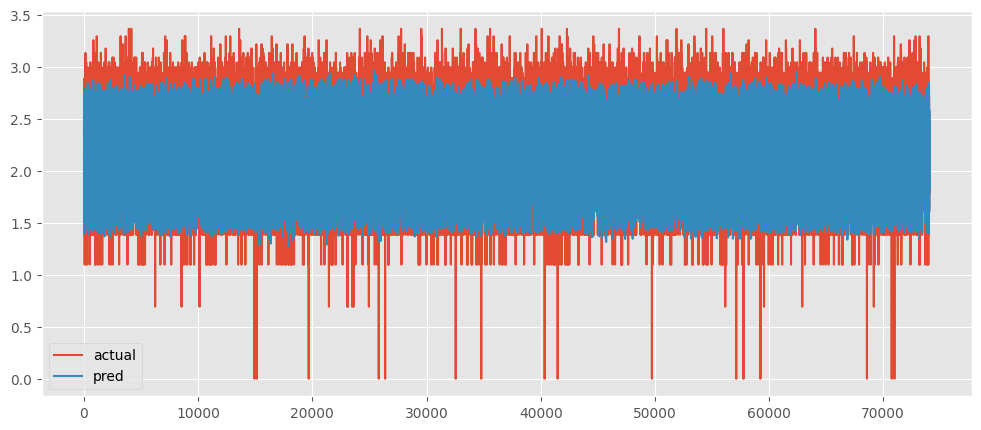

In [ ]:
# 현제 예측 값과 실제 값 차이 확인하기
actual_pred_df = pd.DataFrame({
    "actual" : train_Y,
    "pred" : oof
})
actual_pred_df.plot(figsize = (12,5))

### XGBoost 사용

XGBoost - 카테고리 변수를 읽어올 수 없으므로 int형으로 변환해주어야 함

In [ ]:
categories = train_X.columns[train_X.dtypes=="category"]

In [ ]:
for col in categories:
  train_X[col] = train_X[col].astype("int8")
  test_X[col] = test_X[col].astype("int8")

XGBoost도 Optuna를 활용하여 하이퍼파라미터 조정해보기

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size = 0.4, random_state = 1234, shuffle = False, stratify = None)

In [ ]:
def objective(trial) :
  xgb_params = {
      "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 1.0),
      "seed" : 1234,
      "max_depth" : trial.suggest_int("max_depth", 3, 16),
      "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
      "colsample_bytree" : trial.suggest_uniform("colsample_bytree", 0.2, 0.9),
      "sublsample" : trial.suggest_uniform("sublsample", 0.2, 0.9),
      "gamma": trial.suggest_loguniform("gamma", 1e-8, 1.0),

  }

  xgb_train = xgb.DMatrix(X_train, label = y_train)
  xgb_eval = xgb.DMatrix(X_valid, label = y_valid)
  evals = [(xgb_train, "train"), (xgb_eval, "eval")]

  model_xgb = xgb.train(xgb_params,
                        xgb_train,
                        evals = evals,
                        num_boost_round = 1000, early_stopping_rounds = 20,
                        verbose_eval = 10,
                        )
  y_pred = model_xgb.predict(xgb_eval)
  score = mean_absolute_error(y_valid, y_pred) # 정확도 계산
  return score

In [ ]:
'''
study = optuna.create_study(sampler = optuna.samplers.RandomSampler(seed=0))
study.optimize(objective, n_trials = 50)
study.best_params
'''

'\nstudy = optuna.create_study(sampler = optuna.samplers.RandomSampler(seed=0))\nstudy.optimize(objective, n_trials = 50)\nstudy.best_params\n'

In [ ]:
xgb_params = {
      "learning_rate" : 0.010785971270885446,
      "seed" : 1234,
      "max_depth" : 9,
      "min_child_weight" : 8,
      "colsample_bytree" :0.668941582613637,
      "sublsample" : 0.7496070384161964,
      "gamma": 1.7940760392765822e-06
}

In [ ]:
models_xgb = []
maes_xgb = []
oof_xgb = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X) :
  X_train = train_X.iloc[train_index]
  X_valid = train_X.iloc[val_index]
  y_train = train_Y.iloc[train_index]
  y_valid = train_Y.iloc[val_index] # 각 인덱스를 기준으로 split된 train set과 val set 자르기

  xgb_train = xgb.DMatrix(X_train, label = y_train)
  xgb_eval = xgb.DMatrix(X_valid, label = y_valid)
  evals = [(xgb_train, "train"), (xgb_eval, "eval")]

  model_xgb = xgb.train(xgb_params,
                        xgb_train,
                        evals = evals,
                        num_boost_round = 1000, early_stopping_rounds = 20,
                        verbose_eval = 10,
                        )

  y_pred = model_xgb.predict(xgb_eval)
  tmp_mae =  mean_absolute_error(y_valid, y_pred) # 정확도 계산

  print(tmp_mae)
  models_xgb.append(model_xgb)
  maes_xgb.append(tmp_mae)
  oof_xgb[val_index] = y_pred

[06:42:30] WARNING: /workspace/src/learner.cc:480: 
Parameters: { sublsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:1.76020	eval-rmse:1.76000
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 20 rounds.
[10]	train-rmse:1.58165	eval-rmse:1.58146
[20]	train-rmse:1.42166	eval-rmse:1.42145
[30]	train-rmse:1.27838	eval-rmse:1.27814
[40]	train-rmse:1.15000	eval-rmse:1.14978
[50]	train-rmse:1.03511	eval-rmse:1.03488
[60]	train-rmse:0.93232	eval-rmse:0.93211
[70]	train-rmse:0.84045	eval-rmse:0.84023
[80]	train-rmse:0.75843	eval-rmse:0.75821
[90]	train-rmse:0.68522	eval-rmse:0.68502
[100]	train-rmse:0.61998	eval-rmse:0.61981
[110]	train-rmse:0.56194	eval-rmse:0.56185
[120]	train-rm

In [ ]:
sum(maes_xgb)/len(maes_xgb)

0.13172206971329475

In [ ]:
fifth_mae = sum(maes_xgb)/len(maes_xgb)

In [ ]:
firth_mae - sum(maes_xgb)/len(maes_xgb)

0.0010618314244801308

In [ ]:
third_mae - sum(maes_xgb)/len(maes_xgb)

0.0001493765338412556

In [ ]:
first_mae - sum(maes_xgb)/len(maes_xgb)

0.00025197360404205504

In [ ]:
second_mae - sum(maes_xgb)/len(maes_xgb)

0.00023573597597492668

In [ ]:
print(first_mae, second_mae, third_mae, firth_mae, fifth_mae)

0.1319740433173368 0.13195780568926968 0.131871446247136 0.13278390113777488 0.13172206971329475


<Axes: >

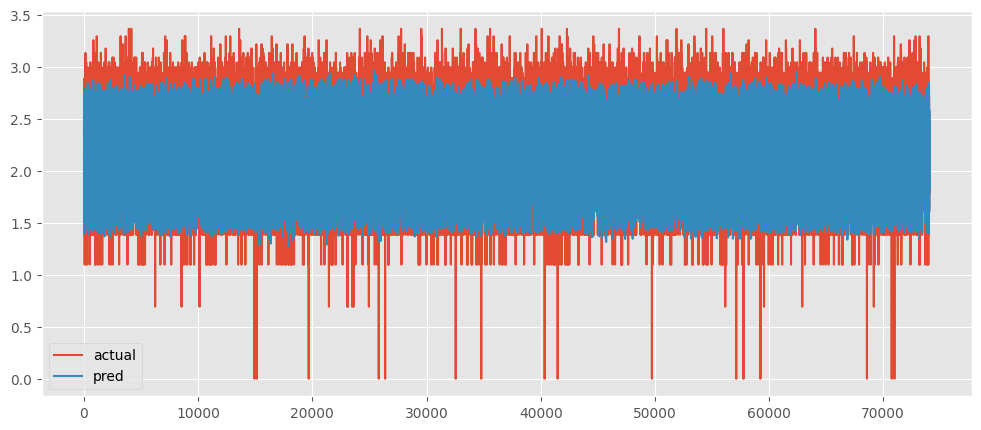

In [ ]:
# 현제 예측 값과 실제 값 차이 확인하기
actual_pred_df = pd.DataFrame({
    "actual" : train_Y,
    "pred" : oof
})
actual_pred_df.plot(figsize = (12,5))

In [ ]:
xgb_test = xgb.DMatrix(test_X)

In [ ]:
# 학습 모델을 사용하여 테스트 데이터의 목적 변수 예측하기
preds_xgb = []

for model in models_xgb :
  pred = model.predict(xgb_test)
  preds_xgb.append(pred)

In [ ]:
preds_array_xgb = np.array(preds_xgb)
preds_mean_xgb = np.mean(preds_array_xgb, axis = 0)

In [ ]:
# 예측 값을 원래 스케일로 되돌리기
preds_exp_xgb = np.exp(preds_mean_xgb)

In [ ]:
# 예측값을 사용하여 submission 파일 작성하기
submission["Age"] = preds_exp_xgb

In [ ]:
# csv 파일로 변환
submission.to_csv("경로/파일명.csv", index = False)

### XGBoost와 LightGBM의 조합

In [ ]:
# XGBoost의 예측 결과와 LightGBM의 예측 결과 평균 구하기
preds_ans = preds_exp_xgb * 0.7 + preds_exp * 0.4

In [ ]:
submission["Age"] = preds_ans

In [ ]:
# csv 파일로 변환
submission.to_csv("경로/파일명.csv", index = False)